## Demo

Demo code for two-step scenario selection and inversion using the non-Gaussian binary digit-MNIST dataset and a linear forward model as the simulator.

For nonlinear forward model, simply replace "dataset.simulator" with the nonlinear simulation function. 

In [2]:
import numpy as np

import dataloader
import util
import model

#load data
dataset = dataloader.DataLoader(simulator=np.load('G.npy'), verbose=True)
x_train, x_test, y_train, y_test, y_reg_train, y_reg_test = dataset.load_data()

#retrain regression model, if ref is changed
load = False
#load = True

#for dobs, assume the label "d_obs_label" and reference model "m_ref" are known
ref = 0
d_obs = y_reg_test[ref:ref+1]
d_obs_label = y_test[ref:ref+1] 
m_ref = x_test[ref:ref+1]

class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

Loaded training data x (60000, 28, 28, 1) and y (60000, 128, 1) and y_labels (60000,)
Loaded testing data x (10000, 28, 28, 1) and y (10000, 128, 1) and y_labels (10000,)


## Step 1: Scenario selection 

In practice, we have only:

1. Model realizations (from multiple scenarios) as "x_train",
2. Pre-defined scenario label as "y_train", and
3. A forward simulator as "dataset.simulator",

and we want to run as little forward simulations as possible through "sample_ratio=0.1".

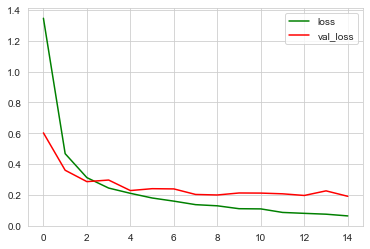

Confusion matrix, without normalization
Validation accuracy: 0.9503333333333334


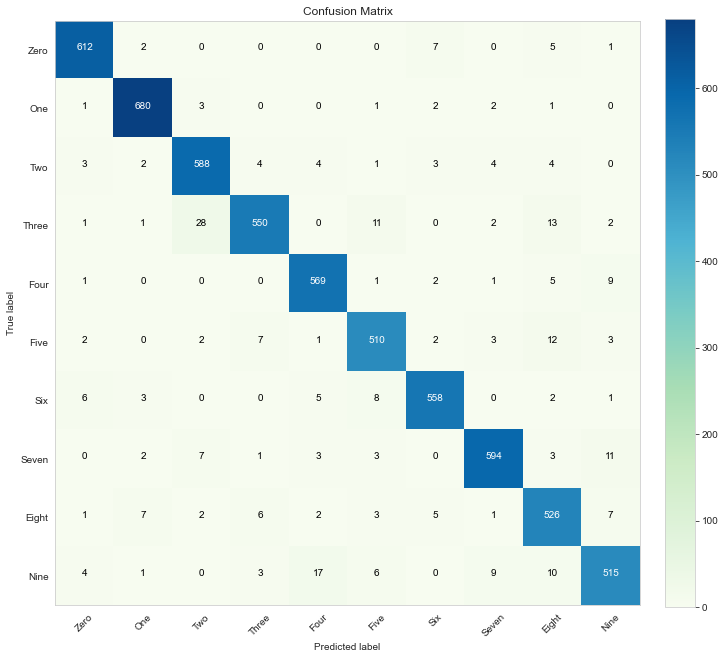

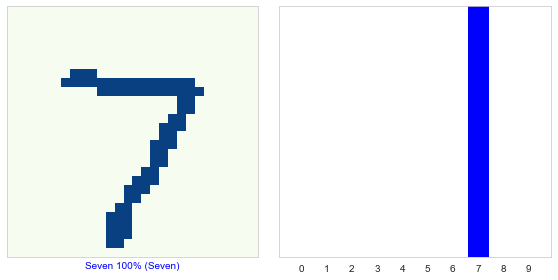

In [3]:
GSI = model.GSI(x_train, y_train, sample_ratio=0.1, simulator=dataset.simulator, class_names=class_names)
GSI.train_classifier(epoch=15, load=load)
GSI.inspect_classifier()

#assume that d_obs_label and m_ref are known 
GSI.get_proportion(d_obs, d_obs_label, m_ref)

## Step 2: Inversion 

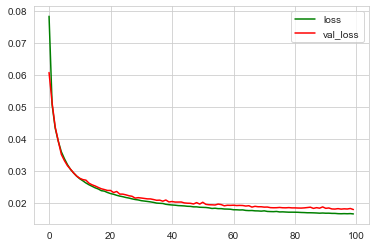

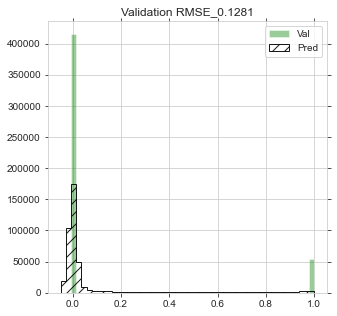

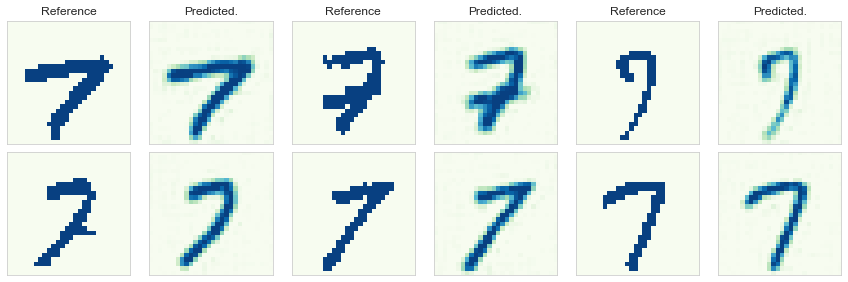

In [4]:
GSI.train_regressor(epoch=100, load=load)
GSI.inspect_regressor()

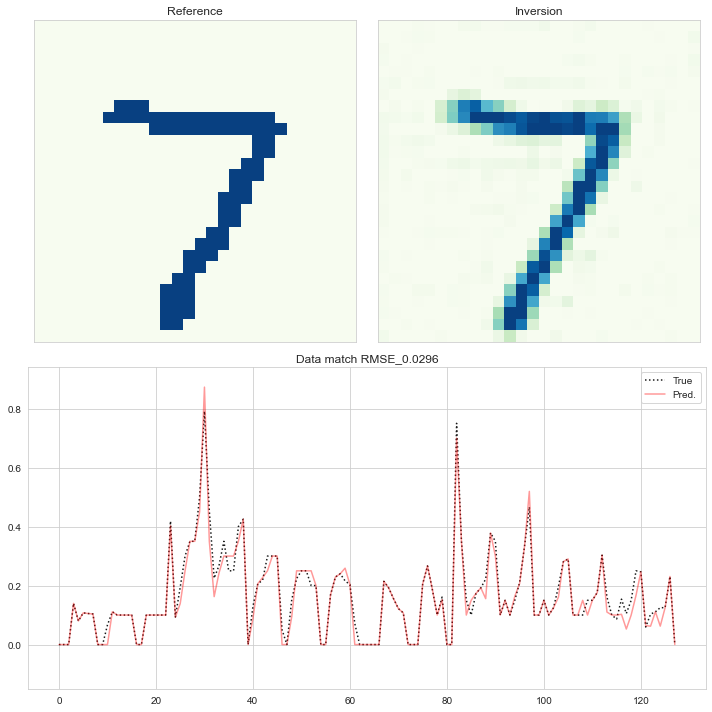

In [5]:
#assume m_ref are known 
GSI.get_inversion(d_obs, m_ref)